## Modelo de detección de caras y géneros.

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras  import layers, models
import cv2
from skimage.io import imread
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import pickle




 Primero cargamos el csv relacionado con 200000 imagenes de famosos sacado de [este](https://www.kaggle.com/datasets/jessicali9530/celeba-dataset) enlace de kaggle.

In [3]:
df_data_img = pd.read_csv("../Modelo_train/list_attr_celeba.csv")


In [4]:
df_data_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_id             202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  int64 
 2   Arched_Eyebrows      202599 non-null  int64 
 3   Attractive           202599 non-null  int64 
 4   Bags_Under_Eyes      202599 non-null  int64 
 5   Bald                 202599 non-null  int64 
 6   Bangs                202599 non-null  int64 
 7   Big_Lips             202599 non-null  int64 
 8   Big_Nose             202599 non-null  int64 
 9   Black_Hair           202599 non-null  int64 
 10  Blond_Hair           202599 non-null  int64 
 11  Blurry               202599 non-null  int64 
 12  Brown_Hair           202599 non-null  int64 
 13  Bushy_Eyebrows       202599 non-null  int64 
 14  Chubby               202599 non-null  int64 
 15  Double_Chin          202599 non-nu

In [5]:
df_data_img[df_data_img == -1] 

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0           NaN              -1.0              NaN         NaN   
1           NaN              -1.0             -1.0        -1.0   
2           NaN              -1.0             -1.0        -1.0   
3           NaN              -1.0             -1.0         NaN   
4           NaN              -1.0              NaN         NaN   
...         ...               ...              ...         ...   
202594      NaN              -1.0             -1.0         NaN   
202595      NaN              -1.0             -1.0        -1.0   
202596      NaN              -1.0             -1.0        -1.0   
202597      NaN              -1.0              NaN         NaN   
202598      NaN              -1.0              NaN         NaN   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
0                  -1.0  -1.0   -1.0      -1.0      -1.0        -1.0  ...   
1                   NaN  -1.0   -1.0      -1.0       NaN        -1.0  ...   
2                  -1.0  -1.0   -1.0       NaN      -1.0        -1.0  ...   
3                  -1.0  -1.0   -1.0      -1.0      -1.0        -1.0  ...   
4                  -1.0  -1.0   -1.0       NaN      -1.0        -1.0  ...   
...                 ...   ...    ...       ...       ...         ...  ...   
202594             -1.0  -1.0   -1.0       NaN      -1.0        -1.0  ...   
202595             -1.0  -1.0    NaN       NaN      -1.0        -1.0  ...   
202596             -1.0  -1.0   -1.0      -1.0      -1.0         NaN  ...   
202597             -1.0  -1.0   -1.0       NaN      -1.0         NaN  ...   
202598             -1.0  -1.0   -1.0      -1.0      -1.0        -1.0  ...   

        Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  \
0            -1.0      NaN            NaN       -1.0               NaN   
1            -1.0      NaN           -1.0       -1.0              -1.0   
2            -1.0     -1.0           -1.0        NaN              -1.0   
3            -1.0     -1.0            NaN       -1.0               NaN   
4            -1.0     -1.0           -1.0       -1.0              -1.0   
...           ...      ...            ...        ...               ...   
202594       -1.0     -1.0           -1.0       -1.0              -1.0   
202595       -1.0      NaN            NaN       -1.0              -1.0   
202596       -1.0      NaN           -1.0       -1.0              -1.0   
202597       -1.0      NaN           -1.0        NaN               NaN   
202598       -1.0     -1.0           -1.0        NaN              -1.0   

        Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  \
0              -1.0               NaN              -1.0             -1.0   
1              -1.0              -1.0              -1.0             -1.0   
2              -1.0              -1.0              -1.0             -1.0   
3              -1.0               NaN               NaN             -1.0   
4              -1.0               NaN              -1.0             -1.0   
...             ...               ...               ...              ...   
202594         -1.0               NaN              -1.0             -1.0   
202595         -1.0              -1.0              -1.0             -1.0   
202596         -1.0              -1.0              -1.0             -1.0   
202597         -1.0               NaN              -1.0             -1.0   
202598         -1.0               NaN              -1.0             -1.0   

        Young  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
202594    NaN  
202595    NaN  
202596    NaN  
202597    NaN  
202598    NaN  

[202599 rows x 41 columns]

In [6]:
df_data_img.replace(-1, 0, inplace=True)

In [7]:
df_data_img

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0       000001.jpg                 0                1           1   
1       000002.jpg                 0                0           0   
2       000003.jpg                 0                0           0   
3       000004.jpg                 0                0           1   
4       000005.jpg                 0                1           1   
...            ...               ...              ...         ...   
202594  202595.jpg                 0                0           1   
202595  202596.jpg                 0                0           0   
202596  202597.jpg                 0                0           0   
202597  202598.jpg                 0                1           1   
202598  202599.jpg                 0                1           1   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
0                     0     0      0         0         0           0  ...   
1                     1     0      0         0         1           0  ...   
2                     0     0      0         1         0           0  ...   
3                     0     0      0         0         0           0  ...   
4                     0     0      0         1         0           0  ...   
...                 ...   ...    ...       ...       ...         ...  ...   
202594                0     0      0         1         0           0  ...   
202595                0     0      1         1         0           0  ...   
202596                0     0      0         0         0           1  ...   
202597                0     0      0         1         0           1  ...   
202598                0     0      0         0         0           0  ...   

        Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  \
0               0        1              1          0                 1   
1               0        1              0          0                 0   
2               0        0              0          1                 0   
3               0        0              1          0                 1   
4               0        0              0          0                 0   
...           ...      ...            ...        ...               ...   
202594          0        0              0          0                 0   
202595          0        1              1          0                 0   
202596          0        1              0          0                 0   
202597          0        1              0          1                 1   
202598          0        0              0          1                 0   

        Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  \
0                 0                 1                 0                0   
1                 0                 0                 0                0   
2                 0                 0                 0                0   
3                 0                 1                 1                0   
4                 0                 1                 0                0   
...             ...               ...               ...              ...   
202594            0                 1                 0                0   
202595            0                 0                 0                0   
202596            0                 0                 0                0   
202597            0                 1                 0                0   
202598            0                 1                 0                0   

        Young  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
202594      1  
202595      1  
202596      1  
202597      1  
202598      1  

[202599 rows x 41 columns]

In [8]:
df_data_img_corto = df_data_img[["image_id","Male"]]

In [9]:
df_data_img_corto

image_id  Male
0       000001.jpg     0
1       000002.jpg     0
2       000003.jpg     1
3       000004.jpg     0
4       000005.jpg     0
...            ...   ...
202594  202595.jpg     0
202595  202596.jpg     1
202596  202597.jpg     1
202597  202598.jpg     0
202598  202599.jpg     0

[202599 rows x 2 columns]

In [10]:
df_data_img_corto.loc[:,"image_id"] = df_data_img_corto["image_id"].str.replace(".jpg", "")

Miramos si está o no balanceada el target, en este caso el género

In [11]:
df_data_img_corto

image_id  Male
0        000001     0
1        000002     0
2        000003     1
3        000004     0
4        000005     0
...         ...   ...
202594   202595     0
202595   202596     1
202596   202597     1
202597   202598     0
202598   202599     0

[202599 rows x 2 columns]

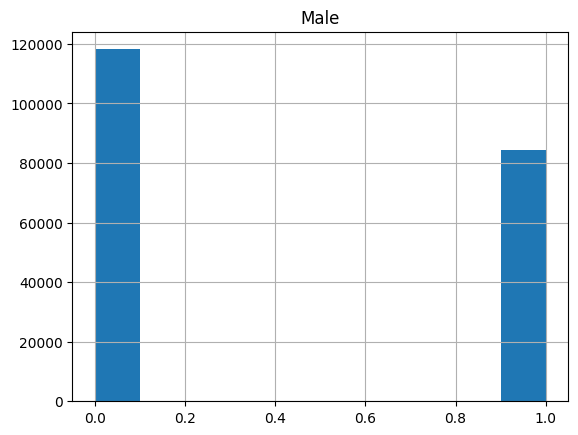

In [12]:
df_data_img_corto.hist();

In [13]:
train = df_data_img_corto[:180000]
test = df_data_img_corto[180000:]

In [14]:
train.tail()

image_id  Male
179995   179996     1
179996   179997     0
179997   179998     0
179998   179999     0
179999   180000     0

In [15]:
train.tail()

image_id  Male
179995   179996     1
179996   179997     0
179997   179998     0
179998   179999     0
179999   180000     0

In [16]:
train["Male"].value_counts()

Male
0    104387
1     75613
Name: count, dtype: int64

In [17]:
test["Male"].value_counts()

Male
0    13778
1     8821
Name: count, dtype: int64

In [18]:
TRAIN_PATH = "../Modelo_train/train/"
TEST_PATH = "../Modelo_train/test/"

Nuevo aproach

In [19]:
main_dir = TRAIN_PATH

In [20]:
train

image_id  Male
0        000001     0
1        000002     0
2        000003     1
3        000004     0
4        000005     0
...         ...   ...
179995   179996     1
179996   179997     0
179997   179998     0
179998   179999     0
179999   180000     0

[180000 rows x 2 columns]

Mostramos una imagen aleatoria del dataset de imagenes

(218, 178, 3)
245


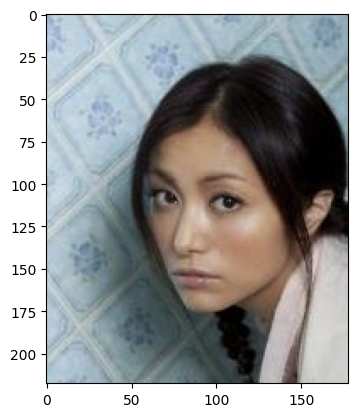

In [88]:
archivos_carpeta = os.listdir(main_dir)

imagen_aleatoria = random.choice(archivos_carpeta)
imagen_path = os.path.join(main_dir,imagen_aleatoria)

image = imread(imagen_path)

print(image.shape)
print(np.max(image))
plt.imshow(image)
plt.show()

Redimensionamos todas las imagenes a 64*64

In [89]:
X = []
y = []

for _, row in train.iterrows():
    image_path = os.path.join(TRAIN_PATH, row['image_id'] + ".jpg",)
    image = cv2.imread(image_path)
    
    if image is None:
        print(f"Error al cargar la imagen: {image_path}")
        continue
    
    image = cv2.resize(image, (32, 32)) 
    X.append(image)
    y.append(row['Male'])

# Convertimos X e y en arrays de numpy
X = np.array(X)
y = np.array(y)

Dividimos entre train y test 

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
print(X_train.shape)
print(X_test.shape)

(144000, 32, 32, 3)
(36000, 32, 32, 3)


In [92]:
print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0
Max: 255


In [93]:
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Min:", np.min(X_train))
print("Max:", np.max(X_train))

Min: 0.0
Max: 1.0


Entrenamos el modelo convolucional.

In [170]:
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [171]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
4500/4500 [==============================] - 51s 10ms/step - loss: 0.2149 - accuracy: 0.9095 - val_loss: 0.1547 - val_accuracy: 0.9364
Epoch 2/5
4500/4500 [==============================] - 20s 4ms/step - loss: 0.1484 - accuracy: 0.9413 - val_loss: 0.1416 - val_accuracy: 0.9433
Epoch 3/5
4500/4500 [==============================] - 21s 5ms/step - loss: 0.1350 - accuracy: 0.9468 - val_loss: 0.1358 - val_accuracy: 0.9451
Epoch 4/5
4500/4500 [==============================] - 20s 5ms/step - loss: 0.1264 - accuracy: 0.9498 - val_loss: 0.1470 - val_accuracy: 0.9431
Epoch 5/5
4500/4500 [==============================] - 21s 5ms/step - loss: 0.1209 - accuracy: 0.9520 - val_loss: 0.1248 - val_accuracy: 0.9499


Guardamos el modelo creado.

In [172]:
import pickle

In [173]:
pickle.dump(model, open("modelo_caras_3.pkl", 'wb'))

Ahora vamos a hacer las predicciones respecto al test

In [174]:
# Hacer predicciones en X_test
predictions = model.predict(X_test)

# Comparar las etiquetas predichas con las etiquetas reales
for i in range(len(X_test)):
    print("Imagen:", i)
    print("Etiqueta real:", y_test[i])
    print("Etiqueta predicha:", round(predictions[i][0]))
    print()

1125/1125 [==============================] - 3s 2ms/step
Imagen: 0
Etiqueta real: 0
Etiqueta predicha: 0

Imagen: 1
Etiqueta real: 1
Etiqueta predicha: 1

Imagen: 2
Etiqueta real: 0
Etiqueta predicha: 0

Imagen: 3
Etiqueta real: 0
Etiqueta predicha: 0

Imagen: 4
Etiqueta real: 0
Etiqueta predicha: 0

Imagen: 5
Etiqueta real: 0
Etiqueta predicha: 0

Imagen: 6
Etiqueta real: 0
Etiqueta predicha: 0

Imagen: 7
Etiqueta real: 0
Etiqueta predicha: 0

Imagen: 8
Etiqueta real: 1
Etiqueta predicha: 1

Imagen: 9
Etiqueta real: 0
Etiqueta predicha: 0

Imagen: 10
Etiqueta real: 1
Etiqueta predicha: 1

Imagen: 11
Etiqueta real: 1
Etiqueta predicha: 1

Imagen: 12
Etiqueta real: 1
Etiqueta predicha: 1

Imagen: 13
Etiqueta real: 1
Etiqueta predicha: 1

Imagen: 14
Etiqueta real: 0
Etiqueta predicha: 0

Imagen: 15
Etiqueta real: 1
Etiqueta predicha: 1

Imagen: 16
Etiqueta real: 0
Etiqueta predicha: 0

Imagen: 17
Etiqueta real: 0
Etiqueta predicha: 0

Imagen: 18
Etiqueta real: 0
Etiqueta predicha: 0

Ima

### Probando el modelo con imagen

In [120]:
def redondeo_pred(prediccion):
    if np.round(prediccion,0) == 1:
        gen = "Hombre"
    else:
        gen = "Mujer"
    return gen

In [175]:
import os
import cv2

face_cascade = cv2.CascadeClassifier("../xml/haarcascade_frontalface_default.xml")

img_original = cv2.imread("../img/faces/7.jpg")
img_detect = cv2.imread("../img/faces/7.jpg")

# Convertimos a escala de grises
img_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGRA2RGB)
gray_dtect = cv2.cvtColor(img_detect, cv2.COLOR_BGR2GRAY)

# Con esto conseguimos difuminar la imagen y asi detectar mejor las imagenes
img_filtered_detect = cv2.blur(gray_dtect, (3, 3))

# Detectamos las caras
faces = face_cascade.detectMultiScale(img_filtered_detect, 1.1, 4)

# Dibujamos rectangulo en cada cara
for (x, y, w, h) in faces:
    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)

for (x, y, w, h) in faces:
    cv2.rectangle(img_filtered_detect, (x, y), (x+w, y+h), (255, 0, 0), 2)



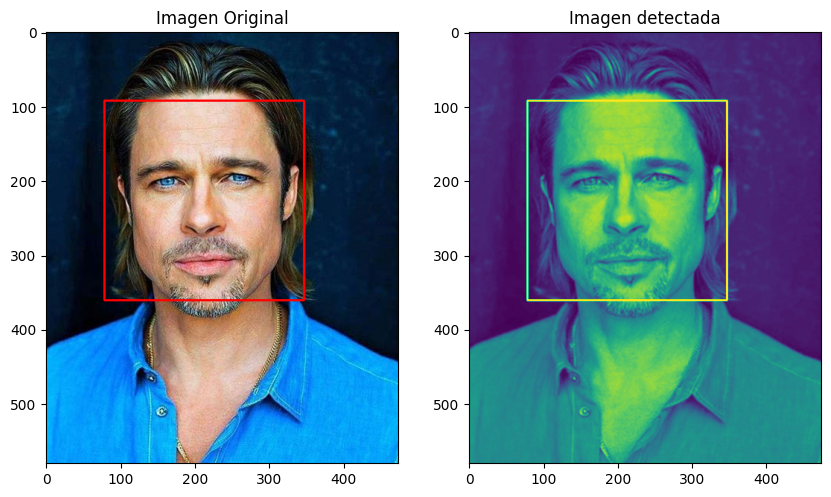

In [176]:
fig = plt.figure(figsize=(10,10))

plt.subplot(121)
plt.title('Imagen Original')
plt.imshow(img_rgb)

plt.subplot(122)
plt.title('Imagen detectada')
plt.imshow(img_filtered_detect);

Hacemos las mismas conversiones realizadas durante la creación del modelo para que funcione correctamente.

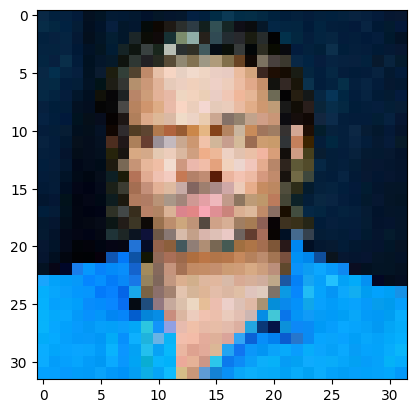

In [177]:
img_rgb_conv = cv2.cvtColor(img_original, cv2.COLOR_BGRA2RGB)
img_conv = cv2.resize(img_rgb_conv, (32, 32))


plt.imshow(img_conv)

In [178]:
img_conv_array = np.array(img_conv)

In [179]:
print(img_conv_array.shape)
print(img_conv_array.shape)
print("Min:", np.min(img_conv_array))
print("Max:", np.max(img_conv_array))

(32, 32, 3)
(32, 32, 3)
Min: 0
Max: 255


In [180]:
img_conv_array = img_conv_array / 255.0

print("Min:", np.min(img_conv_array))
print("Max:", np.max(img_conv_array))

Min: 0.0
Max: 1.0


In [181]:
img_conv_array = np.reshape(img_conv_array, (1, 32, 32, 3))

In [182]:
img_conv_array.shape

(1, 32, 32, 3)

In [188]:
with open('../model/modelo_caras_3.pkl', 'rb') as f:
    modelo_caras = pickle.load(f)

In [189]:
predictions_b = modelo_caras.predict(img_conv_array)

1/1 [==============================] - 0s 224ms/step


In [190]:
predictions_b[0][0]

0.7291417

In [191]:
cv2.putText(img_rgb,redondeo_pred(predictions_b), (x+8,y-8), cv2.FONT_ITALIC,0.7,(255,255,50),1)

array([[[  4,  35,  64],
        [  4,  35,  64],
        [  5,  36,  65],
        ...,
        [  3,  18,  39],
        [  1,  14,  33],
        [  1,  14,  33]],

       [[  4,  35,  64],
        [  4,  35,  64],
        [  4,  35,  64],
        ...,
        [  2,  17,  38],
        [  1,  14,  33],
        [  1,  14,  33]],

       [[  4,  35,  64],
        [  3,  34,  63],
        [  3,  34,  63],
        ...,
        [  2,  17,  38],
        [  0,  13,  32],
        [  0,  13,  32]],

       ...,

       [[ 21, 179, 253],
        [ 13, 173, 247],
        [ 10, 173, 250],
        ...,
        [  9, 185, 222],
        [ 16, 187, 231],
        [ 22, 190, 237]],

       [[ 29, 187, 255],
        [ 18, 178, 252],
        [ 13, 176, 253],
        ...,
        [  3, 172, 211],
        [ 28, 193, 239],
        [ 34, 196, 245]],

       [[ 35, 193, 255],
        [ 21, 181, 255],
        [ 14, 177, 254],
        ...,
        [  9, 177, 216],
        [ 32, 192, 240],
        [ 39, 196, 247]]

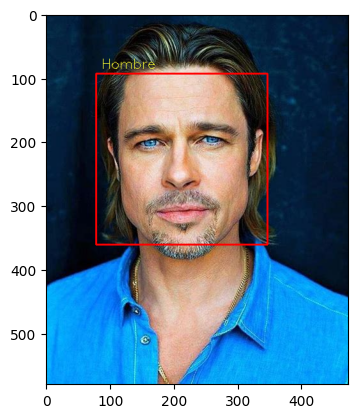

In [192]:
plt.imshow(img_rgb)

Probamos con una mujer también para ver si detecta bien ambos casos

In [193]:
import os
import cv2

face_cascade = cv2.CascadeClassifier("../xml/haarcascade_frontalface_default.xml")

img_original = cv2.imread("../img/faces/180026.jpg")
img_detect = cv2.imread("../img/faces/180026.jpg")

# Convertimos a escala de grises
img_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGRA2RGB)
gray_dtect = cv2.cvtColor(img_detect, cv2.COLOR_BGR2GRAY)

# Con esto conseguimos difuminar la imagen y asi detectar mejor las imagenes
img_filtered_detect = cv2.blur(gray_dtect, (3, 3))

# Detectamos las caras
faces = face_cascade.detectMultiScale(img_filtered_detect, 1.1, 4)

# Dibujamos rectangulo en cada cara
for (x, y, w, h) in faces:
    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)

for (x, y, w, h) in faces:
    cv2.rectangle(img_filtered_detect, (x, y), (x+w, y+h), (255, 0, 0), 2)



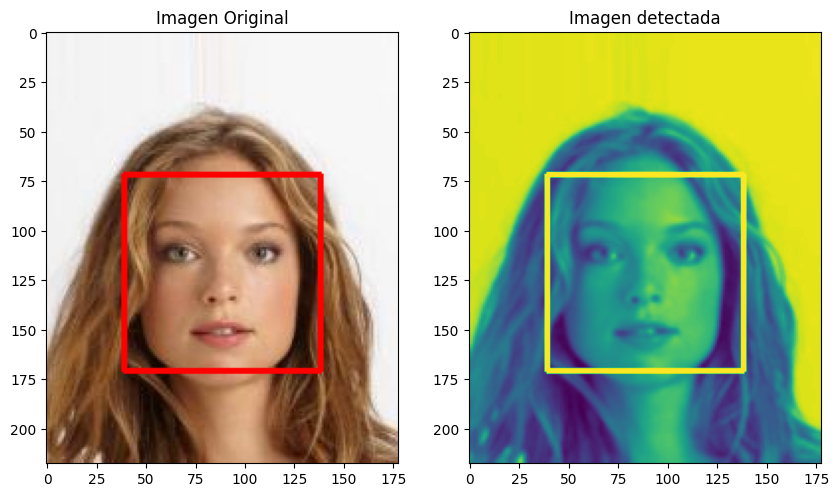

In [194]:
fig = plt.figure(figsize=(10,10))

plt.subplot(121)
plt.title('Imagen Original')
plt.imshow(img_rgb)

plt.subplot(122)
plt.title('Imagen detectada')
plt.imshow(img_filtered_detect);

Conversión imagen

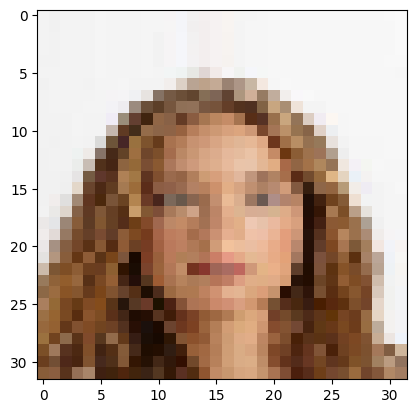

In [195]:
img_rgb_conv = cv2.cvtColor(img_original, cv2.COLOR_BGRA2RGB)
img_conv = cv2.resize(img_rgb_conv, (32,32))


plt.imshow(img_conv)

In [196]:
img_conv_array = np.array(img_conv)

In [197]:
print(img_conv_array.shape)
print(img_conv_array.shape)
print("Min:", np.min(img_conv_array))
print("Max:", np.max(img_conv_array))

(32, 32, 3)
(32, 32, 3)
Min: 0
Max: 252


In [198]:
img_conv_array = img_conv_array / 255

print("Min:", np.min(img_conv_array))
print("Max:", np.max(img_conv_array))

Min: 0.0
Max: 0.9882352941176471


In [199]:
img_conv_array = np.reshape(img_conv_array, (1, 32, 32, 3))

In [200]:
img_conv_array.shape

(1, 32, 32, 3)

In [201]:
with open('../model/modelo_caras_3.pkl', 'rb') as f:
    modelo_caras = pickle.load(f)

In [202]:
predictions_m = modelo_caras.predict(img_conv_array)

1/1 [==============================] - 0s 102ms/step


In [203]:
predictions_m[0][0]

0.23787777

In [204]:
cv2.putText(img_rgb,redondeo_pred(predictions_m), (x+8,y-8), cv2.FONT_ITALIC,0.7,(255,255,50),1)

array([[[242, 242, 242],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [249, 249, 249],
        [247, 247, 247],
        [247, 247, 247]],

       [[242, 242, 242],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [249, 249, 249],
        [247, 247, 247],
        [247, 247, 247]],

       [[242, 242, 242],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [249, 249, 249],
        [247, 247, 247],
        [247, 247, 247]],

       ...,

       [[194, 153, 125],
        [158, 117,  85],
        [141,  98,  63],
        ...,
        [150, 111,  82],
        [145, 106,  75],
        [145, 106,  75]],

       [[185, 144, 114],
        [146, 105,  73],
        [131,  88,  53],
        ...,
        [165, 124,  96],
        [149, 108,  78],
        [149, 108,  76]],

       [[184, 143, 113],
        [145, 104,  72],
        [131,  89,  51],
        ...,
        [121,  77,  48],
        [135,  94,  64],
        [135,  94,  62]]

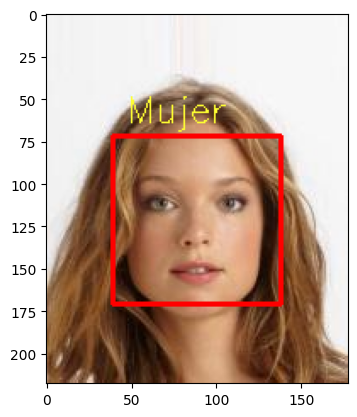

In [205]:
plt.imshow(img_rgb)

Como vemos funciona de manera correcta el modelo.